In [68]:
import newspaper as N
import numpy as np
from google.cloud import language
from google.cloud.language import enums
from google.cloud.language import types

In [124]:
sites = {
    'CNN':'http://www.cnn.com/',
    'Fox':'http://www.foxnews.com/',
    'NPR':'https://www.npr.org/sections/news/',
    'BBC':'http://www.bbc.com/news/world/us_and_canada',
    'NYT':'https://www.nytimes.com/',
    'WaPo':'https://www.washingtonpost.com/',
    'BNN':'http://www.breitbart.com/',
    'Gdn':'https://www.theguardian.com/us',
    'Pol':'https://www.politico.com/',
    'ABC':'http://abcnews.go.com/',
    'Huff':'https://www.huffingtonpost.com/'
}

In [158]:
def get_trump_score(url):
    # Get article text
    site = N.build(url, memoize_articles=False)
    
    scores = []
    for art in site.articles:
        if 'politics' in art.url or 'trump' in art.url.lower():
            art.download()
            art.parse()
            if 'trump' in art.title.lower() or 'trump' in art.text.lower():
                scores.append(get_article_score(art.text))
    filtered_scores = [s for s in scores if s is not None]
    sc, mag = np.array(filtered_scores).T
    return np.average(sc), np.average(mag)
    

def get_article_score(text):
    TRUMPISMS = ['donald j. trump', 'donald j trump', 'donald trump', 'president','trump', 'donald', 'administration']
    
    # Instantiates a client
    client = language.LanguageServiceClient()
    document = types.Document(
        content=text,
        type=enums.Document.Type.PLAIN_TEXT)
    try:
        result = client.analyze_entity_sentiment(document=document)
    except:
        return None
    sents = []
    for entity in result.entities:
        if entity.name.lower() in TRUMPISMS:
            sent = entity.sentiment
            if sent.score != 0 or sent.magnitude != 0:
                sents.append((sent.score, sent.magnitude))
    if len(sents) == 0:
        return None
    score, mag = np.array(sents).T
    return np.average(score), np.average(mag)

In [115]:
print(get_trump_score('BNN'))

(-0.18924731480818921, 0.89731184224928584)


1 of 11. 9.1%


C:\Users\drumm\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2060 bytes but only got 268. Skipping tag 59932
  "Skipping tag %s" % (size, len(data), tag))
C:\Users\drumm\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:709: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))
C:\Users\drumm\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 2060 bytes but only got 1292. Skipping tag 59932
  "Skipping tag %s" % (size, len(data), tag))
C:\Users\drumm\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 33434
  "Skipping tag %s" % (size, len(data), tag))
C:\Users\drumm\Anaconda3\lib\site-packages\PIL\TiffImagePlugin.py:692: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. S

2 of 11. 10.1%
3 of 11. 11.1%
4 of 11. 12.1%
5 of 11. 13.1%
6 of 11. 14.1%
7 of 11. 15.1%
8 of 11. 16.1%
9 of 11. 17.1%
10 of 11. 18.1%
11 of 11. 19.1%


([<matplotlib.axis.XTick at 0x1a4250eb3c8>,
 <a list of 11 Text xticklabel objects>)

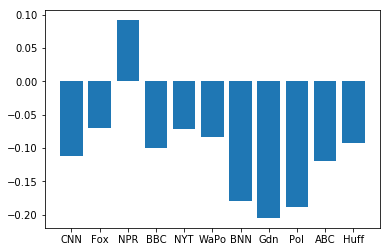

In [159]:
%matplotlib inline
import matplotlib.pyplot as plt
scores = []
mags = []
for i, url in enumerate(sites.values()):
    print('{} of {}. {:.1f}%'.format(i+1, len(sites), i+1/len(sites)*100))
    score, mag = get_trump_score(url)
    scores.append(score)
    mags.append(mag)

([<matplotlib.axis.XTick at 0x1a4256532e8>,
 <a list of 11 Text xticklabel objects>)

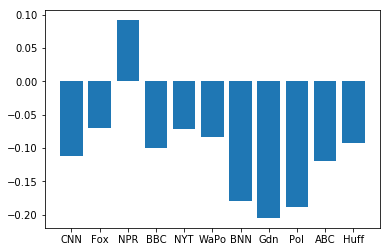

In [160]:
x = np.arange(len(scores))
plt.bar(x, scores)
plt.xticks(x, list(sites)[:len(scores)])

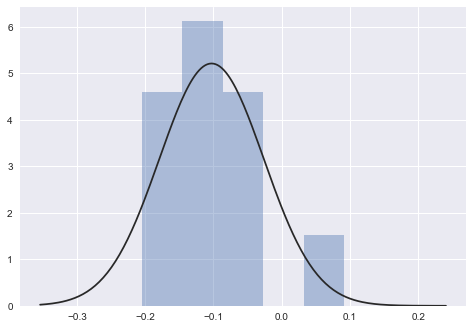

In [167]:
from seaborn import distplot
from scipy.stats import norm
distplot(scores, kde=False, fit=norm)